In [1]:
import torch
from torch import nn 
from torch.utils.data import DataLoader
from torchvision import transforms

from Restformer import Restformer
from dataset import DocumentDenoisingData
from trainer import train_models

import matplotlib.pyplot as plt
from torchinfo import summary
from pathlib import Path

In [2]:
# device agnostic code 

if torch.cuda.is_available():
    device = 'cuda'
else:
    device='cpu'
device

'cuda'

In [3]:
# Hyperparameters 

LEARNING_RATE = 1e-5
BATCH_SIZE = 1
NUM_EPOCHS = 2
IMG_SIZE = 128

MODEL_SAVE_PATH = 'Models/first_train.pth'
RESULT_SAVE_PATH = 'Results/'

In [4]:
# Setting up the transforms 

input_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Grayscale(),
    transforms.Resize(size=(IMG_SIZE,IMG_SIZE)),
    transforms.Normalize(mean=[0.5], std=[0.5])
])

target_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Grayscale(),
    transforms.Resize(size=(IMG_SIZE,IMG_SIZE)),
    transforms.Normalize(mean=[0.5], std=[0.5])
])

In [5]:
# Dataset and dataloaders 

root_dir = 'data'
data = DocumentDenoisingData(root_dir=root_dir, transform=input_transform, target_transform=target_transform)
dataloader = DataLoader(dataset=data, batch_size=BATCH_SIZE, shuffle=True)
len(data), len(dataloader)

(1457, 1457)

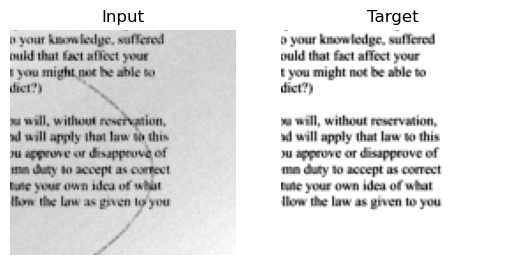

In [ ]:
# visualising random samples from the data 

rnd_idx = torch.randint(0, len(data), (1,))
rnd_data = data[rnd_idx]

input_img = rnd_data['Input']
target_img = rnd_data['Target']

plt.subplot(1,2,1)
plt.imshow(input_img.permute(1,2,0), cmap='gray')
plt.title('Input')
plt.axis(False);

plt.subplot(1,2,2)
plt.imshow(target_img.permute(1,2,0), cmap='gray')
plt.title('Target')
plt.axis(False);

In [7]:
# Creating model instance

model = Restformer().to(device)
model_file = Path(MODEL_SAVE_PATH)

if model_file.is_file():
    model.load_state_dict(torch.load(f=MODEL_SAVE_PATH))
    print("Model exists...")
else:
    print("Model created...")

C:\Users\ganes\AppData\Local\Temp\ipykernel_5812\1934689275.py:7: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(f=MODEL_SAVE_PATH))


Model exists...


In [8]:
# Loss function, optimizer and scaler

loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)
scaler = torch.amp.GradScaler()

In [9]:
# training 

train_models(model=model, 
             dataloader=dataloader, 
             loss_fn=loss_fn, 
             optimizer=optimizer, 
             scaler=scaler, 
             NUM_EPOCHS=NUM_EPOCHS, 
             device=device, 
             model_path=MODEL_SAVE_PATH, 
             result_path=RESULT_SAVE_PATH)

Epoch [7/7]: 100%|██████████| 1457/1457 [04:34<00:00,  5.31it/s, Batch Loss=0.00713, Train Loss=0.0233]
